## Load dan Preprosesing data

In [1]:
#Mendapatkan data mtcars secara otomatis dari link github
!wget -O mtcars.xlsx https://github.com/rajafathurrahman/Data_Analyst/raw/master/mtcars.xlsx

--2019-09-07 01:32:28--  https://github.com/rajafathurrahman/Data_Analyst/raw/master/mtcars.xlsx
Resolving github.com (github.com)... 13.250.177.223
Connecting to github.com (github.com)|13.250.177.223|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajafathurrahman/Data_Analyst/master/mtcars.xlsx [following]
--2019-09-07 01:32:29--  https://raw.githubusercontent.com/rajafathurrahman/Data_Analyst/master/mtcars.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7872 (7.7K) [application/octet-stream]
Saving to: 'mtcars.xlsx'

     0K .......                                               100%  539K=0.01s

2019-09-07 01:32:30 (539 KB/s) - 'mtcars.xlsx' saved [7872/7872]



In [1]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#import data mtcars
df_mtcars = pd.read_excel (r'mtcars.xlsx')

Ketentuan mpg_level :
<ul>
    <li> Jika mpg < 20 maka mpg_level = low </li>
    <li> Jika mpg berkisar 20-30 maka mpg_level = medium </li>
    <li> Jika mpg > 30 maka mpg_level = hard  </li>
</ul>

In [2]:
#melakukan deskritisasi data dan membuat variable baru
df_mtcars.loc[(df_mtcars['mpg'] < 20 ),'mpg_level'] = 'low'
df_mtcars.loc[(df_mtcars['mpg'] >= 20 )&(df_mtcars['mpg'] <= 30 ),'mpg_level'] = 'medium'
df_mtcars.loc[(df_mtcars['mpg'] > 30 ),'mpg_level'] = 'hard'

In [3]:
df_mtcars.head()

,Cars,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg_level
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,medium
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,medium
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,medium
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,low


In [4]:
df_mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 13 columns):
Cars         32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
mpg_level    32 non-null object
dtypes: float64(5), int64(6), object(2)
memory usage: 3.3+ KB


In [5]:
df_mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Eksplorasi Data

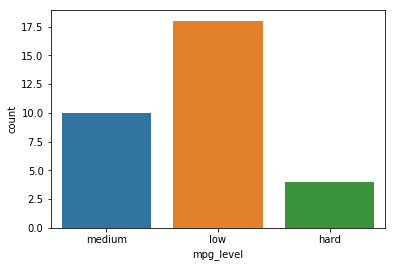

In [6]:
#Distribusi freakuensi mpg_level
sns.countplot(x='mpg_level', data=df_mtcars)

In [7]:
#Crosstab antara juamlah gear dan carb dengan mpg_level
pd.crosstab([df_mtcars['gear'],df_mtcars['carb']], df_mtcars['mpg_level'], margins=True)

mpg_level  hard  low  medium  All
gear carb                        
3    1        0    1       2    3
     2        0    4       0    4
     3        0    3       0    3
     4        0    5       0    5
4    1        2    0       2    4
     2        1    0       3    4
     4        0    2       2    4
5    2        1    0       1    2
     4        0    1       0    1
     6        0    1       0    1
     8        0    1       0    1
All           4   18      10   32

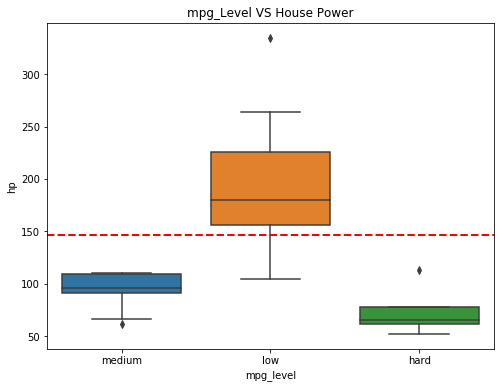

In [8]:
var = 'mpg_level'
data_plt = pd.concat([ df_mtcars['hp'],df_mtcars[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="hp", data=data_plt)
plt.axhline( df_mtcars.hp.mean(),color='r',linestyle='dashed',linewidth=2)
plt.title("mpg_Level VS House Power")
plt.show()

<h3>Relasi anatara variable dari data mtcars memberikan informasi variable mana saja yang memiliki keterkaitan satu dengan lain dan di tampilkan dalam bentuk grafik sccater plot dan heatmap correlasi untuk mendapatkan hal yang sama tetapi hanya menampilkan nilai dari korelasinya saja</h3>

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


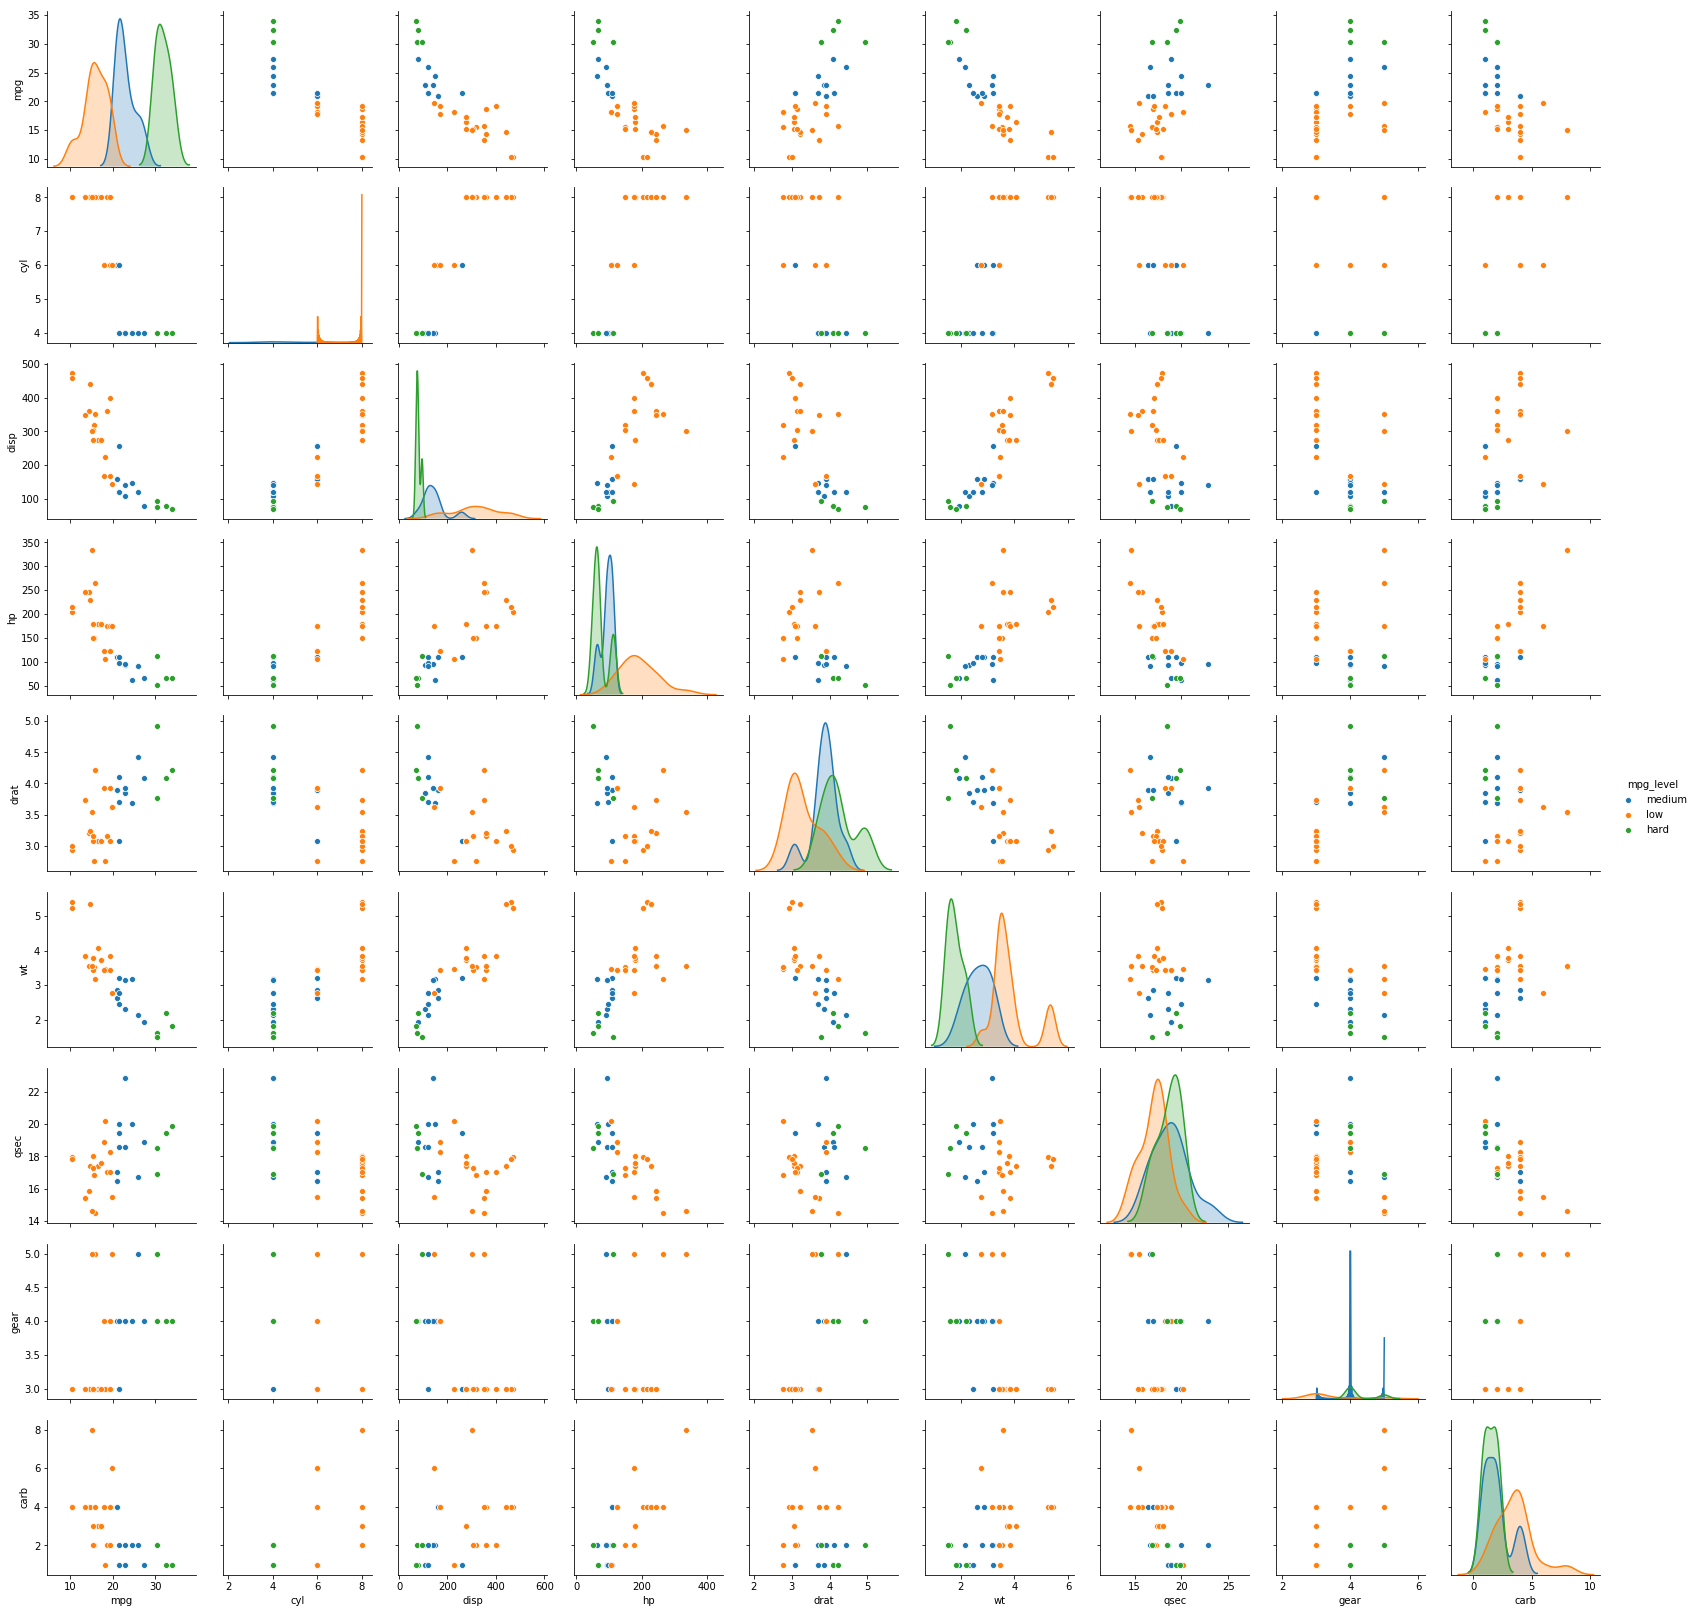

In [9]:
#mendapatkan nilai relasi antara variable 'mpg' ,'cyl' ,'disp' ,'hp','drat','wt','qsec', dan mengkatogerikan sesuai dengan mpg_level
variables = df_mtcars[['mpg' ,'cyl' ,'disp' ,'hp','drat','wt','qsec','gear','carb','mpg_level']]
sns_plot = sns.pairplot(variables,hue='mpg_level')
plt.show()

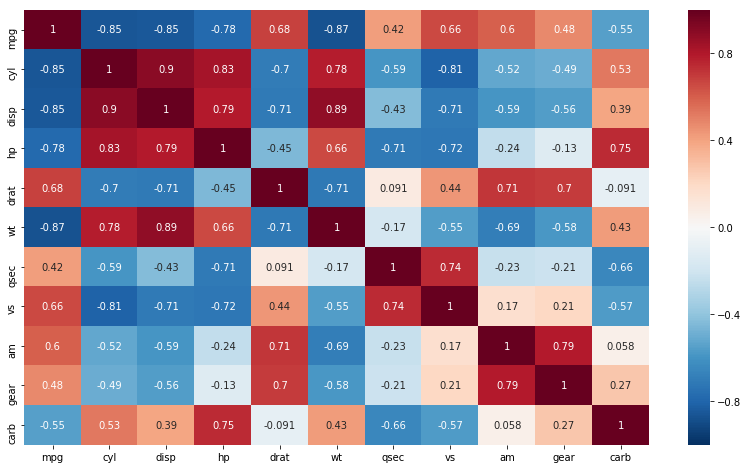

In [10]:
#Correlasi antara variable mtcars dalam bentuk heatmap
correlation = df_mtcars.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")